# 多模态学习第一次作业：神经网络基础

### 说明：本次作业满分100分。共6小题，其中前5小题每题10分，第6小题50分。

### 本次作业中，你需要补全神经网络中基础模块的前向计算方法，并使用这些模块，构建一个简单的神经网络模型，完成一个分类任务。

### **代码填空要求**:
- **在有说明的情况下，可以使用torch.nn.functional，否则请直接使用torch基本张量运算(如torch.max,torch.sum,torch.matmul等)，不允许使用torch.nn.Module！**
- **如必要，代码填空处可以写多行代码，但不得更改其他代码！**

### **最终结果正确不代表得分为满分。请仔细阅读题目中说明！**

### 提交方式:只需要提交这个ipynb文件，命名为 名字_学号_multimodal_hw01.ipynb。提交文件需要保留运行的结果。

### 本次作业不接受任何形式的补交，请仔细阅读关于作业提交的说明！
---

## **题目1:ReLU**
### **描述**
补全ReLU类中的前向计算，对输入张量`x`进行ReLU激活，返回输出张量`y`。

### **示例输入**

```python
x = torch.tensor([
    [
        [[1, -1], [3, 4]],
        [[-5, 6], [-9, 8]]
    ]
])  # 形状为 (1, 2, 2, 2)
```

### **示例输出**

```python
y = torch.tensor([
    [
        [[1, 0], [3, 4]],
        [[0, 6], [0, 8]]
    ]
])  # 形状为 (1, 2, 2, 2)
```

In [1]:
import torch

class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        """
        前向传播: f(x) = max(0, x)
        :param x: 输入 torch.Tensor
        :return: 激活后的输出 (torch.Tensor)
        """
        # 记录哪些位置小于等于0
        self.mask = (x <= 0)

        ## TODO;
        y = x.clone()
        y[self.mask] = 0
        return y

    def backward(self, dout):
        """
        反向传播: 只有输入大于0的位置才保留梯度
        :param dout: 上一层传来的梯度 (torch.Tensor)
        :return: dx (torch.Tensor)
        """
        dx = dout.clone()
        dx[self.mask] = 0
        return dx


module=ReLU()
x = torch.tensor([
    [
        [[1, -1], [3, 4]],
        [[-5, 6], [-9, 8]]
    ]
])  

y=module.forward(x)
print(y)


tensor([[[[1, 0],
          [3, 4]],

         [[0, 6],
          [0, 8]]]])


## **题目2：GlobalMaxPooling**

### **描述**

补全GlobalMaxPooling类中的前向计算。输入给定一个形状为 `(N, C, H, W)` 的四维张量 `x`，其中 N 为样本数量，C 为通道数，H 和 W 为高和宽。请对 `x` 进行处理，实现以下功能：对每个样本的每个通道进行全局最大池化，得到一个形状为 `(N, C)` 的张量 `y`。

### **示例输入**

```python
x = torch.tensor([
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]]
    ],
    [
        [[9, 10], [11, 12]],
        [[13, 14], [15, 16]]
    ]
])  # 形状为 (2, 2, 2, 2)
```

### **示例输出**

```python
y = torch.tensor([
    [4, 8],
    [12, 16]
])  # 形状为 (2, 2)
```

In [2]:
import torch

class GlobalMaxPooling:
    def __init__(self):
        self.x = None       
        self.argmax = None 

    def forward(self, x):
        """
        前向计算: 对输入 x (N, C, H, W) 做全局最大池化，得到 (N, C)
        :param x: torch.Tensor
        :return: y (N, C)
        """
        self.x = x

        # TODO:
        # (N, C, H, W) → (N, C)
        y = x.max(dim=3).values.max(dim=2).values



        # 记录最大值的位置，用于反向传播
        self.argmax = (x == y[:, :, None, None])

        return y
    
    def backward(self, dout):
        """
        反向传播: 将梯度传回到最大值的位置
        :param dout: 来自上一层的梯度 (N, C)
        :return: dx 与输入同形状 (N, C, H, W)
        """
        N, C, H, W = self.x.shape
        dx = torch.zeros_like(self.x)

        # dout (N, C) → 广播到 (N, C, H, W)，再只在最大值位置赋值
        dx[self.argmax] = dout[:, :, None, None][self.argmax]

        return dx


module=GlobalMaxPooling()
x = torch.tensor([
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]]
    ],
    [
        [[9, 10], [11, 12]],
        [[13, 14], [15, 16]]
    ]
])  # 形状为 (2, 2, 2, 2)
y=module.forward(x) #形状为 (2, 2)
print(y)

tensor([[ 4,  8],
        [12, 16]])


## **题目3：Linear**

### **描述**
补全 Linear 类中的前向计算。输入给定一个形状为 (N, d_in) 的二维张量 `x`，其中 N 为样本数量，d_in 为输入特征维度。请对 x 进行处理，实现以下功能：通过线性变换 `y = xW + b` 得到一个形状为 `(N, d_out)` 的张量 `y`。

### **注意**: 请使用torch中的函数手动实现张量运算，不要直接使用torch.nn.Linear类！

### **示例输入**

```python
x = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0]
]) # 形状为 (2, 2)

W = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0]
])  # 形状为 (2, 2)

b = torch.tensor([1.0, -1.0]) #形状为 (2,)
```

### **示例输出**

```python
y = torch.tensor([
    [ 8., 9.],
    [16., 21.]
])
#   # 形状为 (2, 2)
```

In [3]:
import torch

class Linear:
    def __init__(self, d_in, d_out):
        # 初始化权重和偏置
        self.W = torch.randn(d_in, d_out)
        self.b = torch.zeros(d_out)

        # 用于保存前向传播时的输入
        self.x = None
        self.dW=None
        self.db=0
    def forward(self, x):
        """
        前向传播: y = xW + b
        :param x: 输入张量，形状 (N, d_in)
        :return: 输出张量，形状 (N, d_out)
        """
        self.x = x
        ## TODO:
        y = x @ self.W + self.b  # (N, d_out)
        return y

    def backward(self, dout):
        """
        反向传播: 计算梯度并更新参数
        :param dout: 来自上一层的梯度，形状 (N, d_out)
        :param lr: 学习率
        :return: dx, 传回前一层的梯度，形状 (N, d_in)
        """
        # 计算梯度
        dW =  self.x.T@dout             # (d_in, d_out)
        db = dout.sum(dim=0)             # (d_out,)
        dx = dout @ self.W.T               # (N, d_in)

        self.dW=dW
        self.db=db

        return dx


module=Linear(2,2)
x = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0]
]) # 形状为 (2, 2)

module.W = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0]
])  # 形状为 (2, 2)

module.b= torch.tensor([1.0, -1.0]) #形状为 (2,)

y = module.forward(x)
print(y)

tensor([[ 8.,  9.],
        [16., 21.]])




## **题目4：BatchNorm**

### **描述**

补全BatchNorm类中的前向计算,给定一个形状为 `(N, D)` 的张量 `x`，**不使用** `torch.nn.BatchNorm1d`，计算归一化后的输出 `y`。

### **示例输入**

```python
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
gamma = torch.tensor([1.0, 1.0])
beta = torch.tensor([0.0, 0.0])
```

### **示例输出**

```python
y = torch.tensor([[-1.0, -1.0],
                  [1.0, 1.0]])
```

In [4]:
import torch

class BatchNorm:
    def __init__(self, num_features, eps=1e-5):
        # 可学习参数 gamma 和 beta
        self.gamma = torch.ones(num_features)
        self.beta = torch.zeros(num_features)

        # 存储中间结果
        self.eps = eps
        self.cache = None
        self.dgamma=None
        self.dbeta=None
    def forward(self, x):
        """
        前向传播
        :param x: 输入张量 (N, D)
        :return: 输出张量 y (N, D)
        """

        ## TODO
        mean = x.mean(dim=0)   # 均值
        var = x.var(dim=0, unbiased=False)
        std = torch.sqrt(var + self.eps)
        x_n = (x - mean) / (std + self.eps)  # 归一化
        y = self.gamma * x_n + self.beta

        # 保存中间变量以备反向传播
        self.cache = (x, x_n, mean, std)
        return y

    def backward(self, dout):
        """
        反向传播
        :param dout: 上一层梯度 (N, D)
        :return: dx, dgamma, dbeta
        """
        x, x_n, mean, std = self.cache
        N, D = x.shape

        # 对 gamma 和 beta 的梯度
        dgamma = torch.sum(dout * x_n, dim=0)
        dbeta = torch.sum(dout, dim=0)

        # 对输入的梯度
        dx_n = dout * self.gamma
        dx = dx_n / (std + self.eps)   # 简化计算
        self.dgamma=dgamma
        self.dbeta=dbeta
        return dx


module=BatchNorm(2)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
gamma = torch.tensor([1.0, 1.0])
beta = torch.tensor([0.0, 0.0])

module.gamma=gamma
module.beta=beta

y = module.forward(x)
print(y)

tensor([[-1.0000, -1.0000],
        [ 1.0000,  1.0000]])


## **题目5：Convolution**

### **描述**
补全 Conv2d 类中的前向计算。输入给定一个形状为 (N, C_in, H, W) 的四维张量 x，其中 N 为样本数量，C_in 为输入通道数，H 和 W 为高和宽。请对 x 进行卷积运算，得到一个形状为 (N, C_out, H_out, W_out) 的输出张量 y。

### **注意**:
    weight 是卷积核参数，形状为 (C_out, C_in, K, K)

    bias 是偏置参数，形状为 (C_out,)

    stride 为步长，padding 为填充

    卷积计算可以使用 torch.nn.functional.conv2d 完成，但不要使用 torch.nn.Conv2d。

### **示例输入**

```python
x = torch.tensor([[
    [[1., 2., 3.],
     [4., 5., 6.],
     [7., 8., 9.]]
]])  # 形状为 (1, 1, 3, 3)

weight = torch.tensor([[
    [[1., 0.],
     [0., -1.]]
]])  # 形状为 (1, 1, 2, 2)

bias = torch.tensor([0.])  # 形状为 (1,)

stride=1, padding=0
```

### **示例输出**

```python
y = torch.tensor([[
    [[-4., -4.],
     [-4., -4.]]
]])
#   # 形状为 (1,1,2, 2)
```

In [5]:
import torch
import torch.nn.functional as F

class Conv2d:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, lr=0.01):
        self.stride = stride
        self.padding = padding
        self.lr = lr

        # 初始化卷积核和偏置
        self.weight = torch.randn(out_channels, in_channels, kernel_size, kernel_size)
        self.bias = torch.zeros(out_channels)

        # 存储前向传播的输入
        self.x = None
        self.dW=None
        self.db=None
    def forward(self, x):
        """
        前向传播: y = conv2d(x, weight, bias)
        :param x: 输入张量 (N, C_in, H, W)
        :return: 输出张量 (N, C_out, H_out, W_out)
        """
        self.x = x
        ##TODO
        y = F.conv2d(x, self.weight, self.bias, stride=self.stride, padding=self.padding)
        return y

    def backward(self, dout):
        # dx: w.r.t 输入
        dx = F.conv_transpose2d(dout, self.weight, stride=self.stride, padding=self.padding)

        # dW: w.r.t 权重
        dW = torch.nn.grad.conv2d_weight(
            self.x, self.weight.shape, dout,
            stride=self.stride, padding=self.padding
        )

        # db: w.r.t 偏置
        db = dout.sum(dim=(0, 2, 3))

        self.dW = dW
        self.db = db
        return dx




module=Conv2d(1,1,2,1,0)
x = torch.tensor([[
    [[1., 2., 3.],
     [4., 5., 6.],
     [7., 8., 9.]]
]])  # 形状为 (1, 1, 3, 3)

module.weight = torch.tensor([[
    [[1., 0.],
     [0., -1.]]
]])  # 形状为 (1, 1, 2, 2)

module.bias = torch.tensor([0.])  # 形状为 (1,)

y=module.forward(x)
print(y)

tensor([[[[-4., -4.],
          [-4., -4.]]]])


### 探究 Depth-wise Separable卷积
![image.png](attachment.png)
#### **请你回顾Depth-wise Separable卷积的知识，并回答下列问题**:
假设不考虑Bias项，有如下输入和常规卷积核：
```python
x = torch.ones(2, 2, 3, 3)
regular_kernel=torch.randn(3, 2, 2, 2)
```

为了使用Depth-wise Separable卷积替代上述常规卷积，需要两个卷积核,分别实现Depth-wise和Point-wise卷积，如下：
```python
depth_wise_kernel = torch.randn(a, b, c, d)  
point_wise_kernel = torch.randn(e, f, g, h) 
```

为了保证结果形状匹配，请你在下方写出*a*~*h*的值，同时简要说明Depth-wise Separable卷积的优势:

#### **你的回答:**

a=2,b=1,c=3,d=3
e=3,f=2,g=1,h=1

深度可分离卷积有效降低了总参数量和计算量，将in channel和cross channel分别计算，大幅度提升了效率。

## **题目6：神经网络初探**
## 本部分共计50分。

### Step 1: 数据加载与处理
在这个练习中，我们为你提供了一个经典的图片数据集:MNIST，你需要阅读[这个教程](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)及相关资料，了解Dataloader的相关内容，并找到适合读取MNIST的Dataloader。

In [6]:
from torchvision.datasets import MNIST
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## Download MNIST
train_set = MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_set =MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# Check integrity
image, label = train_set[0]
print(image.shape)   # 输出：28x28 图像
print(label)        # 输出：标签，如 5
print(len(train_set)) # 输出：60000
print(len(test_set))  # 输出：10000

## TODO: Dataloader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=4)

print("Data loaded!")

torch.Size([1, 28, 28])
5
60000
10000
Data loaded!



### Step 2: 构建神经网络模型
你需要使用**你先前完成的ReLU类和Linear类**，实现一个3层的MLP模型（一个输入层，一个带有ReLU激活函数的隐藏层，和一个输出层）。下面的代码已经给出框架，请你补全代码。

In [13]:
class MLP:
    def __init__(self, d_in, d_hidden, d_out):
        """
        初始化 MLP 模型
        :param d_in: 输入维度
        :param d_hidden: 隐藏层维度
        :param d_out: 输出维度
        """

        ## TODO:
        self.fc1 = Linear(d_in, d_hidden)
        self.relu = ReLU()
        self.fc2 = Linear(d_hidden, d_out)
       

    def forward(self, x):
        """
        前向传播
        :param x: 输入图片 (N, C, H, W)
        :return: 输出张量 (N, d_out)
        """
       
        ## TODO:
        x = x.view(x.size(0), -1)  # 展平 (N, C*H*W)
        x = self.fc1.forward(x)
        x = self.relu.forward(x)
        x = self.fc2.forward(x)
        return x

    def backward(self, dout):
        """
        反向传播
        :param dout: 来自上一层的梯度 (N, d_out)
        :param lr: 学习率
        :return: None
        hint: dout=module.backward(dout)，此时module自身已经储存梯度。
        """

        ## TODO:
        dout = self.fc2.backward(dout)
        dout = self.relu.backward(dout)
        dout = self.fc1.backward(dout)

    def update(self,lr=0.01):
        """
        参数更新
        ReLU层无需更新
        Linear层：W -= lr*dW, B-=lr*dB
        """
        self.fc1.W -= lr * self.fc1.dW
        self.fc1.b -= lr * self.fc1.db
        self.fc2.W -= lr * self.fc2.dW
        self.fc2.b -= lr * self.fc2.db
        ## TODO:





### Step 3: 交叉熵损失
分类问题中通常使用CrossEntropy Loss作为损失函数，计算损失并返回上游梯度。这部分的代码如下，已经实现完毕。请你阅读代码并熟悉用法。

In [8]:
import torch.nn.functional as F

class CrossEntropy:
    def __init__(self):
        self.logits = None
        self.targets = None
        self.probs = None

    def forward(self, logits, targets):
        """
        前向计算交叉熵
        :param logits: [batch_size, num_classes]
        :param targets: [batch_size] (类别索引)
        :return: scalar loss
        """
        self.logits = logits
        self.targets = targets
        # 计算 log_softmax
        log_probs = F.log_softmax(logits, dim=1)
        # 保存 softmax 概率用于反向传播
        self.probs = log_probs.exp()
        # 负对数似然损失
        loss = F.nll_loss(log_probs, targets, reduction='mean')
        return loss

    def backward(self):
        """
        反向传播，计算 dL/dlogits
        :return: [batch_size, num_classes] 的梯度
        """
        batch_size = self.logits.size(0)
        grad = self.probs.clone()  # softmax 概率
        grad[range(batch_size), self.targets] -= 1  # p - y
        grad = grad / batch_size  # 平均
        return grad



### Step 4: 训练与测试
请你完成训练函数和测试函数的代码，进行可视化，展示：**训练过程的Loss曲线，训练前后模型在测试集上的准确率。**

Test Accuracy: 10.44%


Epoch 1/10: 100%|██████████| 938/938 [00:04<00:00, 196.59it/s, loss=9.78]


Average Loss: 17.760


Epoch 2/10: 100%|██████████| 938/938 [00:05<00:00, 160.25it/s, loss=1.91]


Average Loss: 6.538


Epoch 3/10: 100%|██████████| 938/938 [00:05<00:00, 157.38it/s, loss=3.22]


Average Loss: 4.850


Epoch 4/10: 100%|██████████| 938/938 [00:05<00:00, 162.93it/s, loss=1.73] 


Average Loss: 3.977


Epoch 5/10: 100%|██████████| 938/938 [00:05<00:00, 176.44it/s, loss=4.47] 


Average Loss: 3.409


Epoch 6/10: 100%|██████████| 938/938 [00:05<00:00, 174.98it/s, loss=4.96] 


Average Loss: 2.997


Epoch 7/10: 100%|██████████| 938/938 [00:04<00:00, 191.12it/s, loss=3.88] 


Average Loss: 2.696


Epoch 8/10: 100%|██████████| 938/938 [00:04<00:00, 189.20it/s, loss=2.71] 


Average Loss: 2.441


Epoch 9/10: 100%|██████████| 938/938 [00:04<00:00, 217.60it/s, loss=1.58] 


Average Loss: 2.236


Epoch 10/10: 100%|██████████| 938/938 [00:04<00:00, 209.71it/s, loss=1.47] 


Average Loss: 2.061


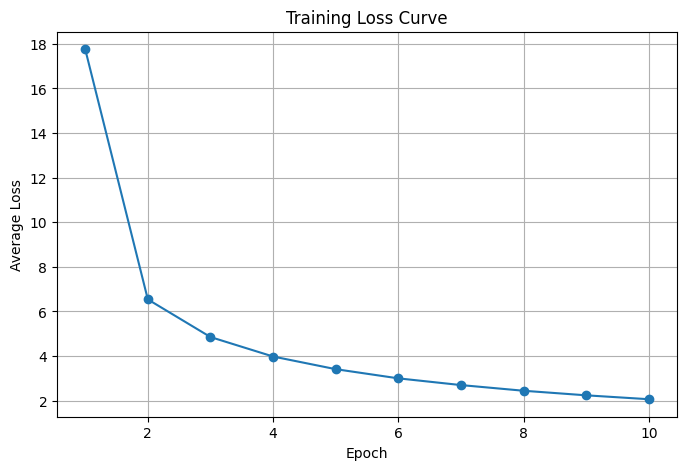

Test Accuracy: 87.44%


0.8744

In [14]:
from tqdm import tqdm
from matplotlib import pyplot as plt

def train(model, train_loader, lr, epochs):
    ## TODO:
    loss_fn = CrossEntropy()
    losses = []
    for epoch in range(1, epochs + 1):
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}")
        avg_loss = 0
        for step, (img, label) in enumerate(progress_bar):

            ## TODO:

            output = model.forward(img)
            loss = loss_fn.forward(output, label)
            grad = loss_fn.backward()  # 上游梯度

            # 模型梯度反传与参数更新：
            model.backward(grad)
            model.update(lr)

            avg_loss += loss.item()

            # 每 10 step 更新一次进度条显示
            if (step + 1) % 10 == 0:
                progress_bar.set_postfix(loss=loss.item())

        epoch_loss = avg_loss / len(train_loader)
        print(f"Average Loss: {epoch_loss:.3f}")
        losses.append(epoch_loss)

    # 绘制 loss 曲线
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), losses, marker='o')
    plt.title("Training Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Average Loss")
    plt.grid(True)
    plt.show()

def test(model, test_loader):
    correct = 0
    total = 0
    # 测试时不需要梯度
    with torch.no_grad():
        for img, label in test_loader:
            output = model.forward(img)           # [batch_size, num_classes]
            preds = output.argmax(dim=1)          # 取最大概率的类别
            correct += (preds == label).sum().item()
            total += label.size(0)

    acc = correct / total
    print(f"Test Accuracy: {acc * 100:.2f}%")
    return acc


## 模型训练预测试

model=MLP(28*28,128,10) # 28*28是图片尺寸
lr=0.005 # 学习率可自行调整

test(model,test_loader) # 训练前测试
train(model,train_loader,lr,epochs=10)  # 训练10epochs
test(model,test_loader) # 训练后测试


### Step 5: 探索超参数
训练过程中涉及的超参数包括:
- batch_size: 批次大小
- learning_rate: 学习率
- d_hidden: 隐藏层维度
  
请你从中选出1~3个，控制变量实验，探究超参数的改变对结果的影响，并说明除了超参数设计之外，还有哪些可以提升模型性能的方法？在下面进行结果展示和解释说明。

Test Accuracy: 8.41%


Epoch 1/10: 100%|██████████| 938/938 [00:03<00:00, 237.44it/s, loss=6.18]


Average Loss: 12.010


Epoch 2/10: 100%|██████████| 938/938 [00:04<00:00, 207.98it/s, loss=5.08] 


Average Loss: 4.090


Epoch 3/10: 100%|██████████| 938/938 [00:04<00:00, 230.41it/s, loss=2.59] 


Average Loss: 2.941


Epoch 4/10: 100%|██████████| 938/938 [00:03<00:00, 271.27it/s, loss=2.68] 


Average Loss: 2.350


Epoch 5/10: 100%|██████████| 938/938 [00:03<00:00, 286.53it/s, loss=1.46] 


Average Loss: 1.972


Epoch 6/10: 100%|██████████| 938/938 [00:02<00:00, 335.18it/s, loss=2.55] 


Average Loss: 1.708


Epoch 7/10: 100%|██████████| 938/938 [00:02<00:00, 351.33it/s, loss=0.899]


Average Loss: 1.508


Epoch 8/10: 100%|██████████| 938/938 [00:02<00:00, 349.03it/s, loss=1.63] 


Average Loss: 1.351


Epoch 9/10: 100%|██████████| 938/938 [00:02<00:00, 429.85it/s, loss=0.405]


Average Loss: 1.229


Epoch 10/10: 100%|██████████| 938/938 [00:02<00:00, 403.03it/s, loss=0.637] 


Average Loss: 1.124


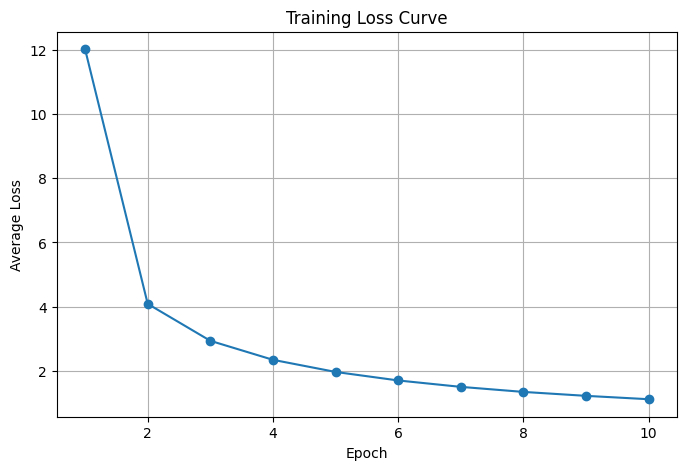

Test Accuracy: 88.29%


0.8829

In [15]:
# 调一下lr
model=MLP(28*28,128,10) # 28*28是图片尺寸
lr=0.01 # 学习率可自行调整

test(model,test_loader) # 训练前测试
train(model,train_loader,lr,epochs=10)  # 训练10epochs
test(model,test_loader) # 训练后测试

Test Accuracy: 16.71%


Epoch 1/10: 100%|██████████| 938/938 [00:10<00:00, 91.18it/s, loss=11.2] 


Average Loss: 18.676


Epoch 2/10: 100%|██████████| 938/938 [00:12<00:00, 73.92it/s, loss=3.44]


Average Loss: 7.643


Epoch 3/10: 100%|██████████| 938/938 [00:13<00:00, 71.51it/s, loss=6.09]


Average Loss: 5.911


Epoch 4/10: 100%|██████████| 938/938 [00:13<00:00, 70.77it/s, loss=6.62] 


Average Loss: 4.981


Epoch 5/10: 100%|██████████| 938/938 [00:13<00:00, 69.19it/s, loss=6.18] 


Average Loss: 4.368


Epoch 6/10: 100%|██████████| 938/938 [00:13<00:00, 70.16it/s, loss=4.44] 


Average Loss: 3.905


Epoch 7/10: 100%|██████████| 938/938 [00:13<00:00, 68.13it/s, loss=5.46] 


Average Loss: 3.549


Epoch 8/10: 100%|██████████| 938/938 [00:13<00:00, 67.90it/s, loss=1.12] 


Average Loss: 3.259


Epoch 9/10: 100%|██████████| 938/938 [00:13<00:00, 70.18it/s, loss=5.75] 


Average Loss: 3.018


Epoch 10/10: 100%|██████████| 938/938 [00:13<00:00, 68.72it/s, loss=2.33]   


Average Loss: 2.813


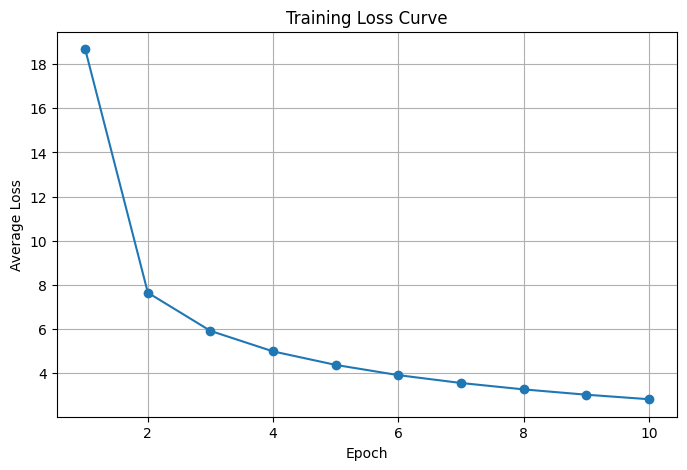

Test Accuracy: 89.19%


0.8919

In [16]:
# 调一下hidden size
model=MLP(28*28,256,10) # 28*28是图片尺寸
lr=0.005 # 学习率可自行调整

test(model,test_loader) # 训练前测试
train(model,train_loader,lr,epochs=10)  # 训练10epochs
test(model,test_loader) # 训练后测试

#### **你的回答:**
可以看到，加大lr和hidden size,都会提升模型性能。这证明了，模型处于一定的欠拟合状态，且容量也不够大。除了调朝参以外，还可以做LR退火等方法，进一步提升性能。更加直接的方法是改变模型结构为CNN,一般来说可以把Acc提升到96%以上。此外，还可以做数据增强并加大训练轮数。